In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import matplotlib.pyplot as plt

In [2]:
# Read data from csv file

df = pd.read_csv("C:\\Users\\91982\\Desktop\\Projects\\LIFE EXPECTANCY PREDICTION FOR POST THORACIC SURGERY - AI\\thoracic+surgery+data\\Thoracic_surgery_survival_prediction\\Data Preprocessing\\thoracic_surgery.csv")

In [3]:
X = df.drop(['Death_In_1yr', 'MI_6mo', 'Asthma'], axis=1)
y = df['Death_In_1yr']

In [4]:
y.value_counts()

Death_In_1yr
0    385
1     69
Name: count, dtype: int64

In [5]:
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.3, random_state=7, stratify=y)



def dl_model(X_train, X_test, Y_train, Y_test):
    model = Sequential()
    model.add(Dense(24, activation='relu', input_shape=(X_train.shape[1],)))
    model.add(Dense(12, activation='relu'))
    model.add(Dense(1, activation='sigmoid'))
    
    
    # model summary
    model.summary()

    model.compile(optimizer='adam', loss='binary_crossentropy',
                  metrics=['accuracy'])

    hist = model.fit(X_train, Y_train,epochs=100,
                     validation_data=(X_test, Y_test))
    
    
    fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 8))

    # Plot loss and validation loss on the first subplot
    ax1.plot(hist.history['loss'], label='Training Loss')
    ax1.plot(hist.history['val_loss'], label='Validation Loss')
    ax1.set_xlabel('Number of Iterations')
    ax1.set_ylabel('Loss')
    ax1.legend()

    # Plot accuracy and validation accuracy on the second subplot
    ax2.plot(hist.history['accuracy'], label='Training Accuracy')
    ax2.plot(hist.history['val_accuracy'], label='Validation Accuracy')
    ax2.set_xlabel('Number of Iterations')
    ax2.set_ylabel('Accuracy')
    ax2.legend()

    plt.tight_layout()
    plt.show()

    return model



c:\Program Files\Python312\Lib\site-packages\keras\src\layers\core\dense.py:88: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 24)             │           360 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 12)             │           300 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │            13 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 673 (2.63 KB)

 Trainable params: 673 (2.63 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - accuracy: 0.8489 - loss: 0.4256 - val_accuracy: 0.8467 - val_loss: 0.4670
Epoch 2/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.8666 - loss: 0.3849 - val_accuracy: 0.8467 - val_loss: 0.4653
Epoch 3/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.8316 - loss: 0.4532 - val_accuracy: 0.8467 - val_loss: 0.4724
Epoch 4/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.8469 - loss: 0.4284 - val_accuracy: 0.8467 - val_loss: 0.4654
Epoch 5/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.8883 - loss: 0.3531 - val_accuracy: 0.8467 - val_loss: 0.4666
Epoch 6/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8692 - loss: 0.3762 - val_accuracy: 0.8467 - val_loss: 0.4654
Epoch 7/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8582 - loss: 0.3926 - val_accuracy: 0.8467 - val_loss: 0.4664
Epoch 8/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8630 - loss: 0.3884 - val_accuracy: 0.8467 - 

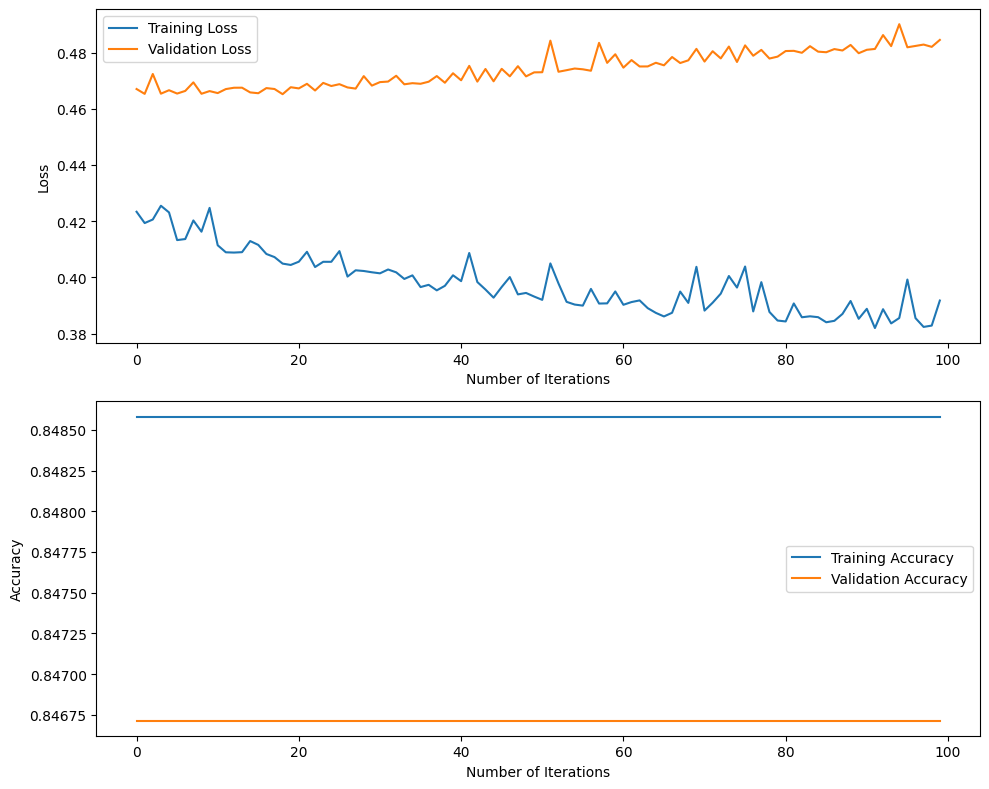

In [6]:
model = dl_model(X_train, X_test, Y_train, Y_test)

In [7]:
model.evaluate(X_test, Y_test)

y_pred = model.predict(X_test)
y_pred = y_pred.round().flatten()

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8348 - loss: 0.4846 
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step 


In [8]:
print("classification report : \n", classification_report(Y_test, y_pred))

classification report : 
               precision    recall  f1-score   support

           0       0.85      1.00      0.92       116
           1       0.00      0.00      0.00        21

    accuracy                           0.85       137
   macro avg       0.42      0.50      0.46       137
weighted avg       0.72      0.85      0.78       137



c:\Program Files\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Program Files\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Program Files\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Udersampling

In [9]:
from sklearn.utils import resample

In [10]:
# Separate majority and minority classes
maj_class = df[df['Death_In_1yr'] == 0]
min_class = df[df['Death_In_1yr'] == 1]

In [11]:
# Downsample majority class
maj_downsampled = resample(maj_class,  replace=False,n_samples=len(min_class),random_state=7)  # reproducible results

In [12]:
df_downsampled = pd.concat([maj_downsampled, min_class])

X = df_downsampled.drop(['Death_In_1yr', 'MI_6mo', 'Asthma'], axis=1)
y = df_downsampled['Death_In_1yr']

In [13]:
X_train, X_test, Y_train, Y_test = train_test_split(
    X, y, test_size=0.3, random_state=7, stratify=y)

c:\Program Files\Python312\Lib\site-packages\keras\src\layers\core\dense.py:88: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_3 (Dense)                 │ (None, 24)             │           360 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 12)             │           300 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 1)              │            13 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 673 (2.63 KB)

 Trainable params: 673 (2.63 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 83ms/step - accuracy: 0.5664 - loss: 0.7175 - val_accuracy: 0.5000 - val_loss: 0.7205
Epoch 2/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - accuracy: 0.5065 - loss: 0.7286 - val_accuracy: 0.5952 - val_loss: 0.6762
Epoch 3/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - accuracy: 0.5690 - loss: 0.6975 - val_accuracy: 0.7143 - val_loss: 0.6745
Epoch 4/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - accuracy: 0.5495 - loss: 0.6890 - val_accuracy: 0.6429 - val_loss: 0.6706
Epoch 5/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - accuracy: 0.4909 - loss: 0.6927 - val_accuracy: 0.5238 - val_loss: 0.6820
Epoch 6/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - accuracy: 0.5495 - loss: 0.6864 - val_accuracy: 0.5238 - val_loss: 0.6788
Epoch 7/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - accuracy: 0.5052 - loss: 0.6795 - val_accuracy: 0.6190 - val_loss: 0.6688
Epoch 8/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step - accuracy: 0.4961 - loss: 0.6933 - val_accuracy: 0.6190 - val_loss:

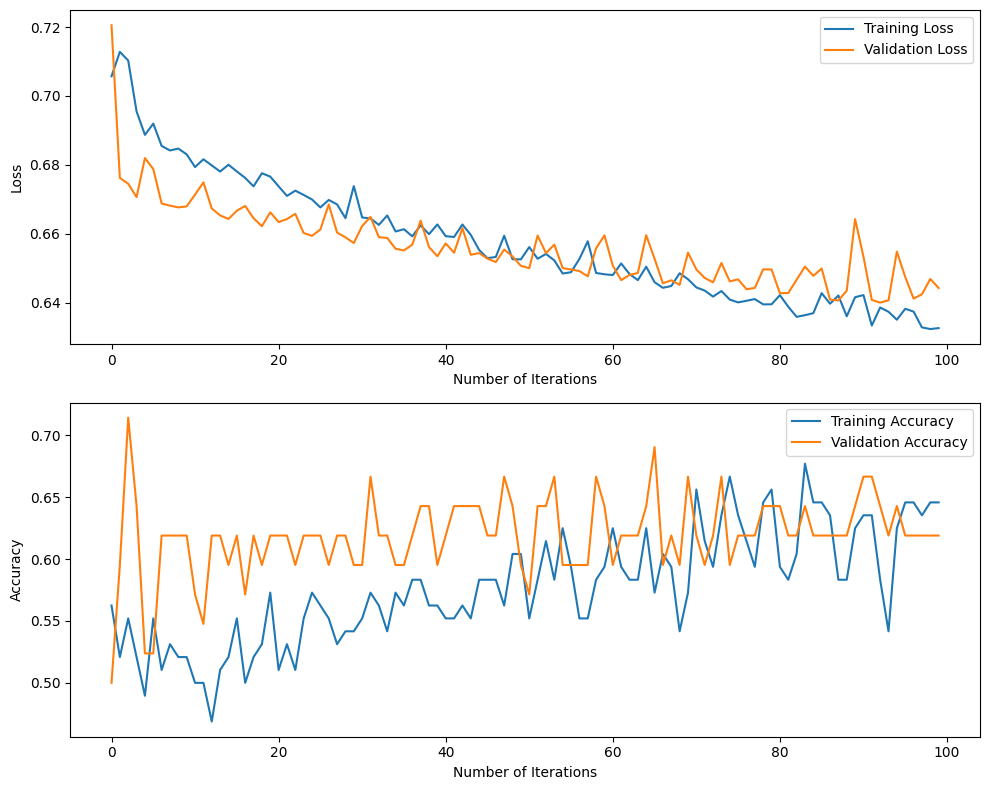

In [14]:
model = dl_model(X_train, X_test, Y_train, Y_test)


In [15]:
model.evaluate(X_test, Y_test)

y_pred = model.predict(X_test)
y_pred = y_pred.round().flatten()

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6419 - loss: 0.6289 
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step


In [16]:
print("classification report : \n", classification_report(Y_test, y_pred))

classification report : 
               precision    recall  f1-score   support

           0       0.60      0.71      0.65        21
           1       0.65      0.52      0.58        21

    accuracy                           0.62        42
   macro avg       0.62      0.62      0.62        42
weighted avg       0.62      0.62      0.62        42



In [ ]:
model.save('my_model_undersampling.keras')

Oversampaling


In [17]:
from imblearn.over_sampling import RandomOverSampler


X = df.drop(['Death_In_1yr', 'MI_6mo', 'Asthma'], axis=1)
y = df['Death_In_1yr']

# Apply oversampling
oversampler = RandomOverSampler(random_state=42)
X_res, y_res = oversampler.fit_resample(X, y)

In [18]:
X_train, X_test, Y_train, Y_test = train_test_split(
    X_res, y_res, test_size=0.3, random_state=7, stratify=y_res)

c:\Program Files\Python312\Lib\site-packages\keras\src\layers\core\dense.py:88: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_6 (Dense)                 │ (None, 24)             │           360 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 12)             │           300 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 1)              │            13 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 673 (2.63 KB)

 Trainable params: 673 (2.63 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 0.5189 - loss: 1.1632 - val_accuracy: 0.4978 - val_loss: 0.8066
Epoch 2/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5033 - loss: 0.7335 - val_accuracy: 0.4675 - val_loss: 0.6977
Epoch 3/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5329 - loss: 0.6823 - val_accuracy: 0.5455 - val_loss: 0.7003
Epoch 4/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5935 - loss: 0.6738 - val_accuracy: 0.5195 - val_loss: 0.6872
Epoch 5/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.5571 - loss: 0.6740 - val_accuracy: 0.5844 - val_loss: 0.6917
Epoch 6/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6105 - loss: 0.6757 - val_accuracy: 0.5455 - val_loss: 0.6823
Epoch 7/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6204 - loss: 0.6596 - val_accuracy: 0.5931 - val_loss: 0.6820
Epoch 8/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6259 - loss: 0.6590 - val_accuracy: 0.5671 - 

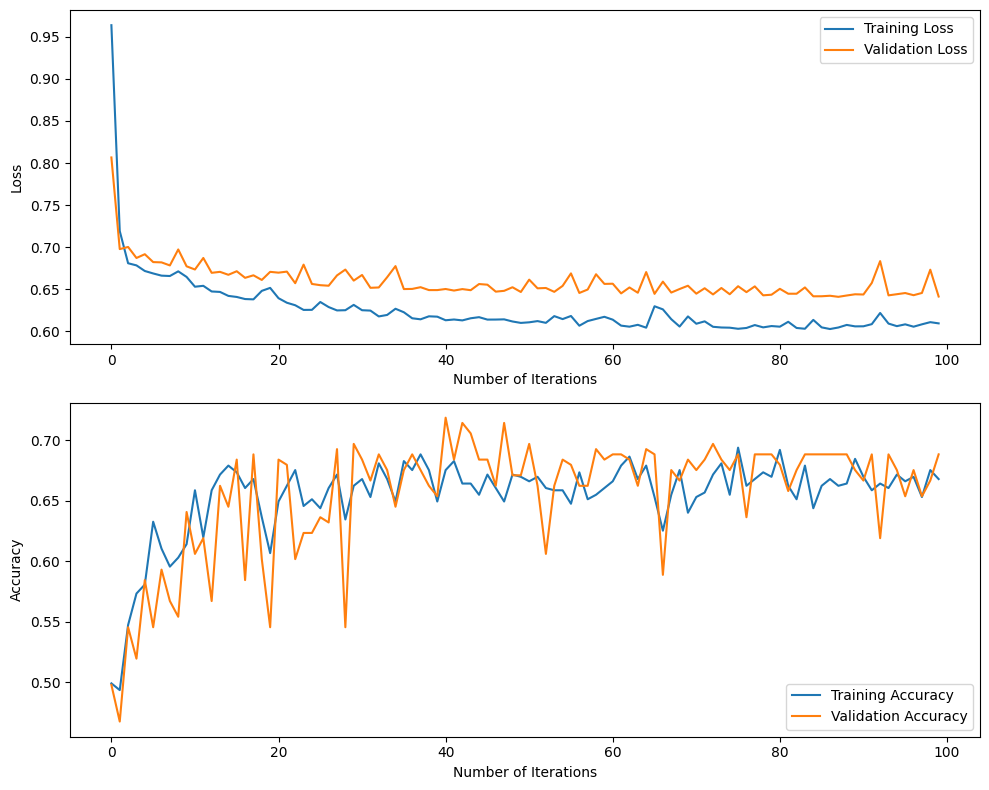

In [19]:
model = dl_model(X_train, X_test, Y_train, Y_test)


In [20]:
model.evaluate(X_test, Y_test)

y_pred = model.predict(X_test)
y_pred = y_pred.round().flatten()

8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6905 - loss: 0.6375 
1/8 ━━━━━━━━━━━━━━━━━━━━ 0s 117ms/stepWARNING:tensorflow:5 out of the last 11 calls to <function TensorFlowTrainer.make_predict_function.<locals>.one_step_on_data_distributed at 0x00000188E3A1EA20> triggered tf.function retracing. Tracing is expensive and the excessive number of tracings could be due to (1) creating @tf.function repeatedly in a loop, (2) passing tensors with different shapes, (3) passing Python objects instead of tensors. For (1), please define your @tf.function outside of the loop. For (2), @tf.function has reduce_retracing=True option that can avoid unnecessary retracing. For (3), please refer to https://www.tensorflow.org/guide/function#controlling_retracing and https://www.tensorflow.org/api_docs/python/tf/function for  more details.
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step


In [21]:
print("classification report : \n", classification_report(Y_test, y_pred))

classification report : 
               precision    recall  f1-score   support

           0       0.73      0.59      0.65       115
           1       0.66      0.78      0.72       116

    accuracy                           0.69       231
   macro avg       0.70      0.69      0.69       231
weighted avg       0.70      0.69      0.69       231



In [22]:
model.save('my_model_rand_ovr_Samp.h5')

In [23]:
# SMOTE over sampling

from imblearn.over_sampling import SMOTE

X = df.drop(['Death_In_1yr', 'MI_6mo', 'Asthma'], axis=1)
y = df['Death_In_1yr']


In [24]:
# Apply SMOTE
smote = SMOTE(random_state=44)
X_res, y_res = smote.fit_resample(X, y)

In [25]:
X_train, X_test, Y_train, Y_test = train_test_split(
    X_res, y_res, test_size=0.3, random_state=7, stratify=y_res)

c:\Program Files\Python312\Lib\site-packages\keras\src\layers\core\dense.py:88: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_9 (Dense)                 │ (None, 24)             │           360 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 12)             │           300 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 1)              │            13 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 673 (2.63 KB)

 Trainable params: 673 (2.63 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - accuracy: 0.5075 - loss: 1.5487 - val_accuracy: 0.5022 - val_loss: 0.7593
Epoch 2/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5187 - loss: 0.7544 - val_accuracy: 0.4978 - val_loss: 0.7484
Epoch 3/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5089 - loss: 0.7026 - val_accuracy: 0.5108 - val_loss: 0.6961
Epoch 4/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.4956 - loss: 0.7029 - val_accuracy: 0.4762 - val_loss: 0.7008
Epoch 5/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5218 - loss: 0.6944 - val_accuracy: 0.5281 - val_loss: 0.6917
Epoch 6/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5514 - loss: 0.7023 - val_accuracy: 0.4978 - val_loss: 0.7443
Epoch 7/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.4292 - loss: 0.7266 - val_accuracy: 0.4762 - val_loss: 0.6993
Epoch 8/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5023 - loss: 0.7012 - val_accuracy: 0.5195 - 

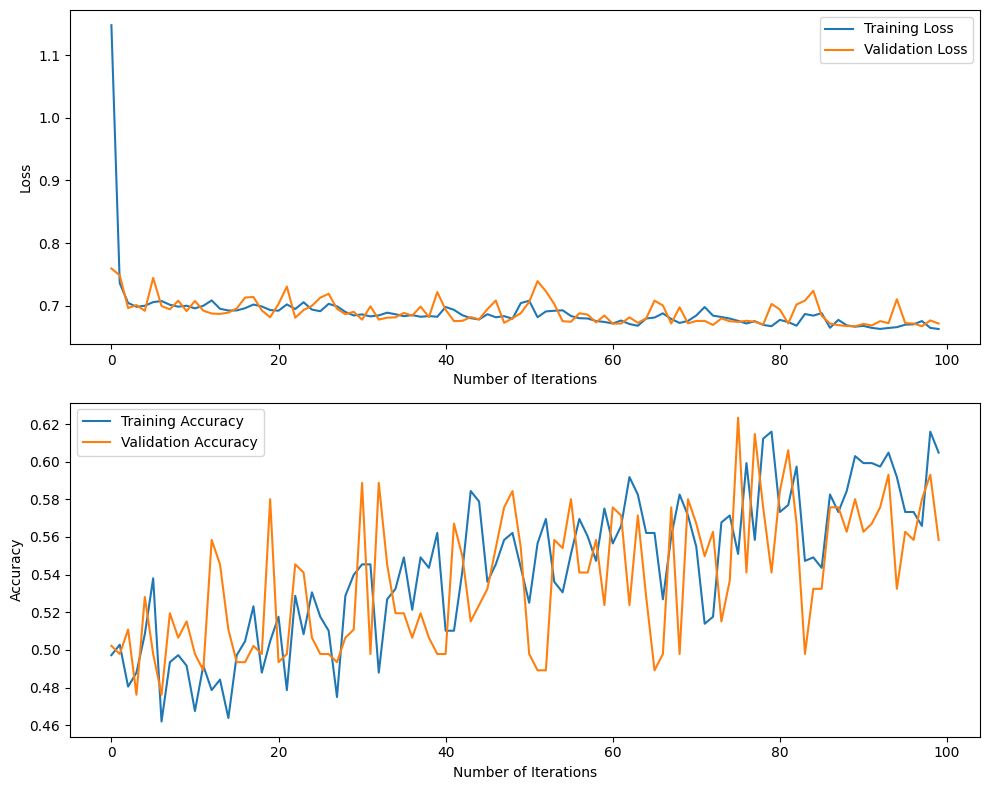

In [26]:
model = dl_model(X_train, X_test, Y_train, Y_test)

In [27]:
model.evaluate(X_test, Y_test)

y_pred = model.predict(X_test)
y_pred = y_pred.round().flatten()

8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5884 - loss: 0.6598  
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 


In [28]:
print("classification report : \n", classification_report(Y_test, y_pred))

classification report : 
               precision    recall  f1-score   support

           0       0.59      0.38      0.46       115
           1       0.54      0.73      0.62       116

    accuracy                           0.56       231
   macro avg       0.57      0.56      0.54       231
weighted avg       0.57      0.56      0.54       231

